### 7 April Assignment Solution

### Q1. What is the relationship between polynomial functions and kernel functions in machine learning algorithms?

In machine learning, kernel functions are used to enable Support Vector Machines (SVMs) to efficiently perform in a higher-dimensional feature space without explicitly computing the coordinates of the data in that space. This technique is known as the **kernel trick**. A polynomial kernel is a specific type of kernel function that computes the similarity between two vectors in a polynomial feature space.

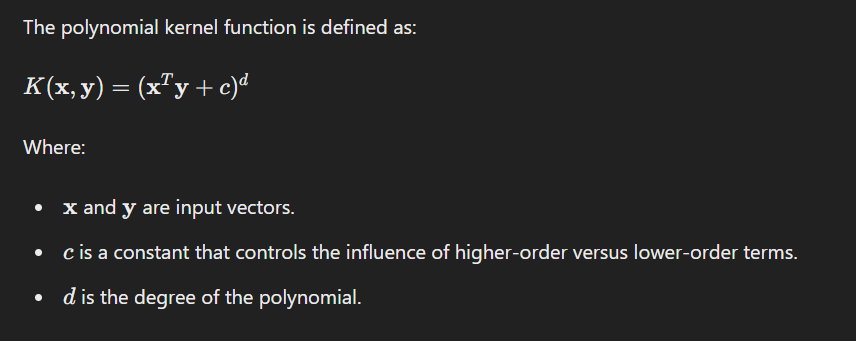

Accuracy with polynomial kernel (degree=3): 0.7333333333333333


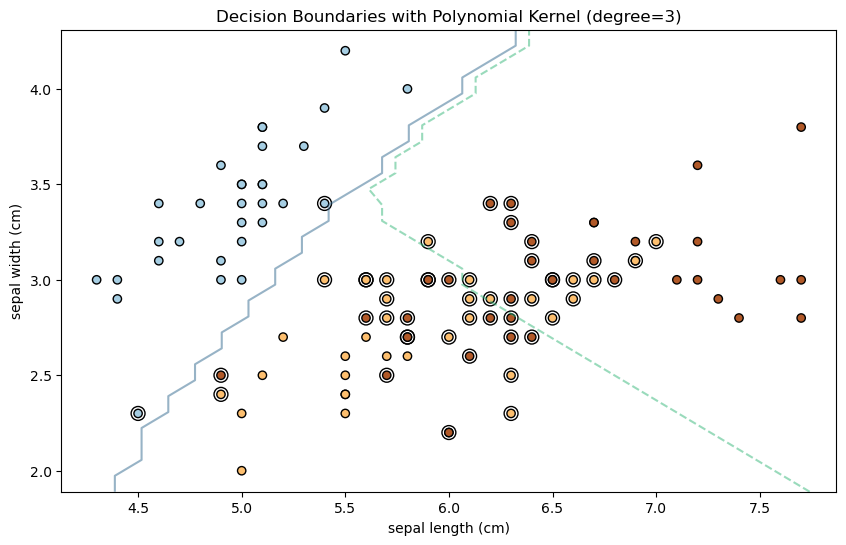

In [7]:
### Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?

# Here is an example of implementing an SVM with a polynomial kernel using Scikit-learn:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization purposes
y = iris.target

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a polynomial kernel SVM classifier on the training set
degree = 3  # Degree of the polynomial
clf = SVC(kernel='poly', degree=degree, C=1)
clf.fit(X_train, y_train)

# Predict the labels for the testing set
y_pred = clf.predict(X_test)

# Compute the accuracy of the model on the testing set
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy with polynomial kernel (degree={degree}): {accuracy}')

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolors='k')

# Plot decision boundary and margins
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy)
if len(Z.shape) > 1:
    Z = np.argmax(Z, axis=1)
Z = Z.reshape(XX.shape)

ax.contour(XX, YY, Z, levels=[-1, 0, 1, 2], alpha=0.5, linestyles=['--', '-', '--'])
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')

plt.title(f'Decision Boundaries with Polynomial Kernel (degree={degree})')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()



### Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?

In Support Vector Regression (SVR), the epsilon (\(\epsilon\)) parameter defines a margin of tolerance where no penalty is given to errors. It represents the width of the tube around the predicted function within which no penalty is associated with the training data points.

When the value of \(\epsilon\) is increased:
- The margin of tolerance increases, allowing more data points to lie within the tube without contributing to the loss function.
- As a result, fewer data points will lie outside the \(\epsilon\)-tube and thus fewer points will be support vectors.
- This generally leads to a simpler model that may underfit the data if \(\epsilon\) is too large.

Conversely, decreasing \(\epsilon\) will make the margin narrower, leading to more support vectors and potentially a more complex model that may overfit the data if \(\epsilon\) is too small.



### Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter affect the performance of Support Vector Regression (SVR)?

#### Kernel Function
- **Effect**: The kernel function defines the type of decision boundary used by the SVR. Common kernels include linear, polynomial, and RBF (Radial Basis Function).
- **When to adjust**: 
  - Use a linear kernel for linearly separable data.
  - Use a polynomial or RBF kernel for non-linearly separable data.

#### C Parameter
- **Effect**: The \(C\) parameter controls the trade-off between achieving a low error on the training data and minimizing the model complexity. A larger \(C\) puts more emphasis on fitting the training data well, potentially at the cost of generalization.
- **When to adjust**: 
  - Increase \(C\) to reduce bias and fit the training data more closely (may lead to overfitting).
  - Decrease \(C\) to increase bias, allow more misclassifications, and potentially improve generalization (may lead to underfitting).

#### Epsilon Parameter
- **Effect**: The \(\epsilon\) parameter sets the width of the margin in which no penalty is given to errors. A larger \(\epsilon\) allows for a wider tube and fewer support vectors.
- **When to adjust**: 
  - Increase \(\epsilon\) to simplify the model and potentially reduce overfitting.
  - Decrease \(\epsilon\) to capture more details and potentially reduce underfitting.

#### Gamma Parameter (for RBF kernel)
- **Effect**: The \(\gamma\) parameter defines the influence of a single training example. A low \(\gamma\) value means that the influence is far, whereas a high \(\gamma\) means that the influence is close.
- **When to adjust**: 
  - Increase \(\gamma\) to make the model more sensitive to individual data points (may lead to overfitting).
  - Decrease \(\gamma\) to make the model less sensitive to individual data points (may lead to underfitting).

### Example of SVR with different parameters:



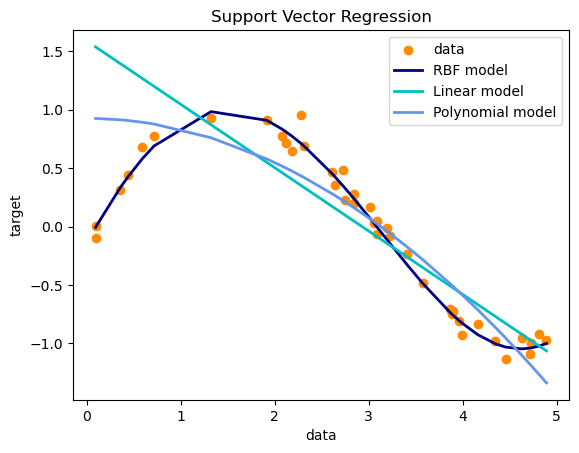

Mean Squared Error (RBF): 0.0062779456170275905
Mean Squared Error (Linear): 0.23407348132831696
Mean Squared Error (Polynomial): 0.10104770772331931


In [4]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(40) * 0.1

# Fit SVR models with different parameters
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

# Plot the results
plt.scatter(X, y, color='darkorange', label='data')
plt.plot(X, y_rbf, color='navy', lw=2, label='RBF model')
plt.plot(X, y_lin, color='c', lw=2, label='Linear model')
plt.plot(X, y_poly, color='cornflowerblue', lw=2, label='Polynomial model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

# Print the mean squared error of each model
print("Mean Squared Error (RBF):", mean_squared_error(y, y_rbf))
print("Mean Squared Error (Linear):", mean_squared_error(y, y_lin))
print("Mean Squared Error (Polynomial):", mean_squared_error(y, y_poly))



### Q5. Assignment:

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load the iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an instance of the SVC classifier
svc = SVC(kernel='linear', random_state=42)

# Train the classifier on the training data
svc.fit(X_train, y_train)

# Predict the labels of the testing data
y_pred = svc.predict(X_test)

# Evaluate the performance using accuracy, precision, recall, F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [2, 3, 4],  # Only relevant for 'poly' kernel
    'gamma': ['scale', 'auto']
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV instance on the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: ", grid_search.best_score_)

# Use the best estimator found by GridSearchCV
best_svc = grid_search.best_estimator_

# Train the tuned classifier on the entire dataset
best_svc.fit(X, y)

# Save the trained classifier to a file
import pickle
pickle.dump(best_svc,open('best_svc_model.pkl','wb'))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45

Accuracy Score: 0.9777777777777777
Best parameters found:  {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy:  0.9523809523809523
